In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/BankChurners.csv')

In [3]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [4]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)


In [5]:
df.drop(columns='CLIENTNUM',inplace=True)

In [6]:
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [7]:
df.drop(columns=['Total_Trans_Amt','Total_Trans_Ct'],inplace=True)

In [8]:
df.drop(columns=['Months_on_book','Total_Revolving_Bal','Avg_Open_To_Buy'],inplace=True)

In [10]:
df['Education_Level'].replace({'Unknown':np.nan,'Post-Graduate':'Advanced_Degree','Doctorate':'Advanced_Degree'},inplace=True)
df['Marital_Status'].replace({'Unknown':np.nan},inplace=True)
df['Income_Category'].replace({'Unknown':np.nan},inplace=True)

In [11]:
from sklearn import set_config

set_config(transform_output="pandas")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [13]:
pip install mlflow dagshub

  Using cached mlflow-3.3.2-py3-none-any.whl.metadata (30 kB)
  Using cached dagshub-0.6.3-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.1 MB/s eta 0:00:00
   

In [14]:
import dagshub
dagshub.init(repo_owner='Ranjan113', repo_name='credit-card-churn', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=ed34840f-ffff-435d-9fcf-2158dd6d18a1&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=f04ae6cbc1014fddfe9efb887453d5d838174ffed4abd366511bd7722bcaf9a6




Accessing as Ranjan113

Initialized MLflow to track repo "Ranjan113/credit-card-churn"

Repository Ranjan113/credit-card-churn initialized!

In [15]:
pip install mlflow

In [16]:
import mlflow

In [17]:
mlflow.set_tracking_uri("https://dagshub.com/Ranjan113/credit-card-churn.mlflow")

In [19]:
mlflow.set_experiment("Exp. 2 - Comapring different Sampling techniques")

<Experiment: artifact_location='mlflow-artifacts:/9b26926f33324d6cbef641c33cb0713a', creation_time=1757064772047, experiment_id='4', last_update_time=1757064772047, lifecycle_stage='active', name='Exp. 2 - Comapring different Sampling techniques', tags={}>

In [18]:
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: https://dagshub.com/Ranjan113/credit-card-churn.mlflow


In [20]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [22]:
gender_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
])

education_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]))
])

marital_income_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('gender',gender_pipe,['Gender']),
    ('education',education_pipe,['Education_Level']),
    ('marital_income',marital_income_pipe,['Marital_Status','Income_Category']),
    ('encoding_card',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Card_Category']),
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])


],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

In [24]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('gender',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender']),
                                ('education',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'...
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Card_Category']),
                                ('power_transform', PowerTransformer(),
                                 ['Customer_Age', 'Dependent_count',
                                  'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio',
                                  'Avg_Transaction_Value'])],
                  verbose_feature_names_out=False)

In [25]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_le = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_le = y_test['Attrition_Flag'].map(attrition_mapping)

In [26]:
X_train_trans

,Gender_M,Education_Level,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,...,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
9066,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.959258,-1.030003,-1.793403,0.708120,0.503496,-0.309292,-0.778101,-0.050823,0.908638,1.172073
5814,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.463294,1.273801,-1.793403,1.516161,0.503496,0.123375,-1.416404,-1.566770,0.526568,-0.100760
792,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.167461,1.273801,1.419512,-1.462786,0.503496,1.154879,-0.031668,2.043316,-0.503469,-1.241935
1791,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.528333,-0.237365,0.112226,0.708120,1.400593,-0.342197,1.718343,2.186996,1.386074,0.064657
5011,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.331976,-0.237365,0.763100,0.708120,1.400593,-0.712863,-0.737080,0.456656,1.409218,0.345680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.291966,-1.030003,-0.532052,-0.251801,2.290559,-0.180220,0.341399,0.615988,1.230751,-0.524785
5191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.833549,0.528036,0.112226,0.708120,3.174639,0.527315,-1.043842,-2.088727,-1.201196,-0.100871
5390,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.540531,1.273801,-0.532052,-1.462786,-0.402630,-0.935267,0.318076,1.242934,1.343325,0.383618
860,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.788480,0.528036,0.112226,-1.462786,-1.321044,-0.363611,-1.330572,-2.088727,0.946516,-1.793187


In [ ]:
# now we will try types of samlping techniques and comapre results on logistic reg

In [27]:
pip install imbalanced-learn

In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score,precision_recall_curve, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


In [49]:
attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_enc = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_enc = y_test['Attrition_Flag'].map(attrition_mapping)


ros = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train_enc)

X_train_res = preprocessor.fit_transform(X_train_res)
X_test_trans = preprocessor.transform(X_test)


lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred = lr.predict(X_test_trans)
y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

Precision: 0.381
Recall: 0.716


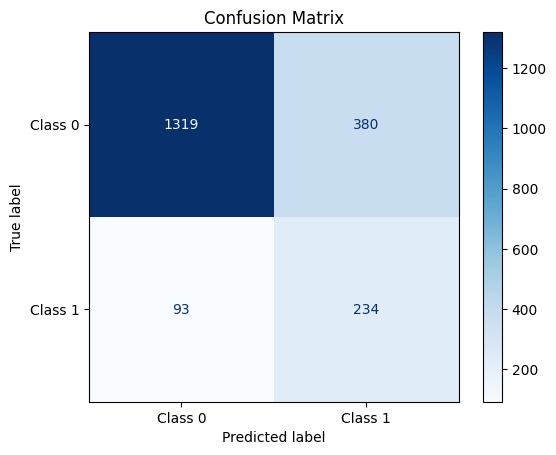

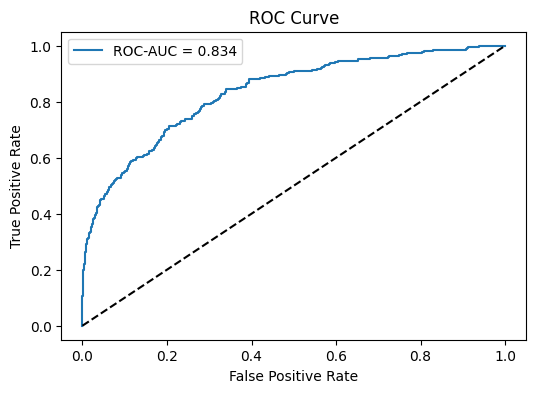

ROC-AUC Score: 0.8339534138628047


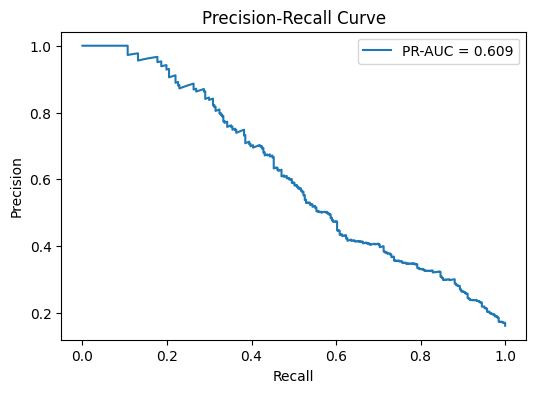

PR-AUC Score: 0.6088543251964946


In [51]:
prec = precision_score(y_test_enc, y_pred)
rec = recall_score(y_test_enc, y_pred)
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC-AUC Score:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test_enc, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
print("PR-AUC Score:", pr_auc)

In [33]:
with mlflow.start_run(run_name="random over sampler"):

    # log parameters
    mlflow.log_param("experiment_type","random over sampler")
    mlflow.log_params(lr.get_params())


    # fit model
    lr.fit(X_train_res, y_train_res)

    # Predict
    y_pred = lr.predict(X_test_trans)
    y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

    # calcualte metrics
    prec = precision_score(y_test_enc, y_pred)
    rec = recall_score(y_test_enc, y_pred)
    roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_enc, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals)

    # log metrics
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("pr_auc", pr_auc)

    # confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # roc curve
    fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    plt.close()

    # pr-curve
    plt.figure(figsize=(6,4))
    plt.plot(recall_vals, precision_vals, label=f"PR-AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.savefig("pr_curve.png")
    mlflow.log_artifact("pr_curve.png")
    plt.close()

    print(f"Precision: {prec:.3f}, Recall: {rec:.3f}")
    print(f"ROC-AUC Score: {roc_auc:.3f}, PR-AUC Score: {pr_auc:.3f}")

Precision: 0.381, Recall: 0.716
ROC-AUC Score: 0.834, PR-AUC Score: 0.609
🏃 View run random over sampler at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4/runs/1a6191676a1b460e87646184080e2cef
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4


In [ ]:
# true positive rate(tpr) -> out of all churners hum kitno ko identify kr paaye.               we want to maximize it
# flase positive rate(fpr) -> out of all those non churners humne kitno ko churner btaya.      we want to reduce it

In [60]:
attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_enc = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_enc = y_test['Attrition_Flag'].map(attrition_mapping)


rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train_enc)

X_train_res = preprocessor.fit_transform(X_train_res)
X_test_trans = preprocessor.transform(X_test)


lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred = lr.predict(X_test_trans)
y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

Precision: 0.372
Recall: 0.722


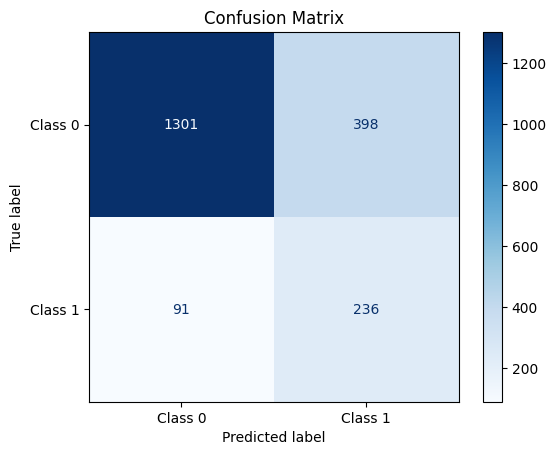

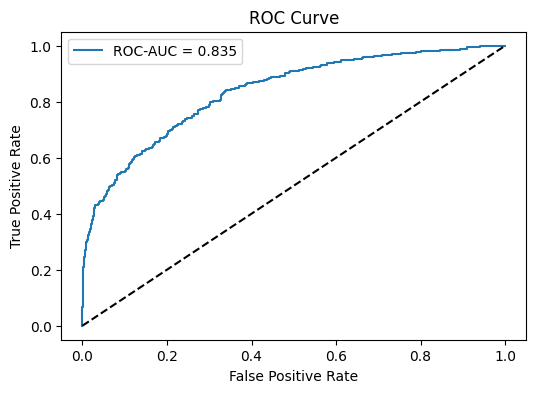

ROC-AUC Score: 0.835324970795917


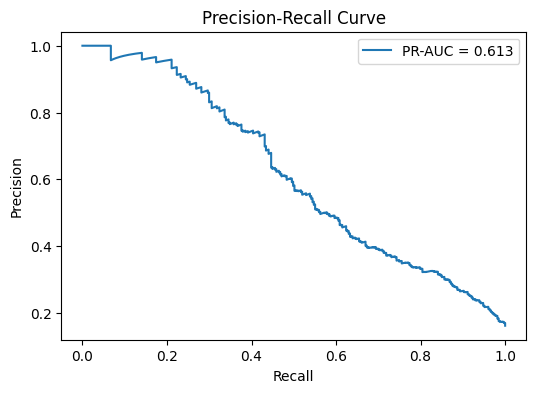

PR-AUC Score: 0.6130594990027013


In [61]:
prec = precision_score(y_test_enc, y_pred)
rec = recall_score(y_test_enc, y_pred)
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC-AUC Score:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test_enc, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
print("PR-AUC Score:", pr_auc)

In [36]:
with mlflow.start_run(run_name="random under sampler"):

    # log parameters
    mlflow.log_param("experiment_type","random under sampler")
    mlflow.log_params(lr.get_params())


    # fit model
    lr.fit(X_train_res, y_train_res)

    # predict
    y_pred = lr.predict(X_test_trans)
    y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

    # calcualte metrics
    prec = precision_score(y_test_enc, y_pred)
    rec = recall_score(y_test_enc, y_pred)
    roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_enc, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals)

    # log metrics
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("pr_auc", pr_auc)

    # Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # roc curve
    fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    plt.close()

    # pr-curve
    plt.figure(figsize=(6,4))
    plt.plot(recall_vals, precision_vals, label=f"PR-AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.savefig("pr_curve.png")
    mlflow.log_artifact("pr_curve.png")
    plt.close()

    print(f"Precision: {prec:.3f}, Recall: {rec:.3f}")
    print(f"ROC-AUC Score: {roc_auc:.3f}, PR-AUC Score: {pr_auc:.3f}")

Precision: 0.372, Recall: 0.722
ROC-AUC Score: 0.835, PR-AUC Score: 0.613
🏃 View run random under sampler at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4/runs/3e367591b72844aeb62500f9ae5235fe
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4


In [68]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_enc = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_enc = y_test['Attrition_Flag'].map(attrition_mapping)


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_trans, y_train_enc)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred = lr.predict(X_test_trans)
y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

Precision: 0.386
Recall: 0.706


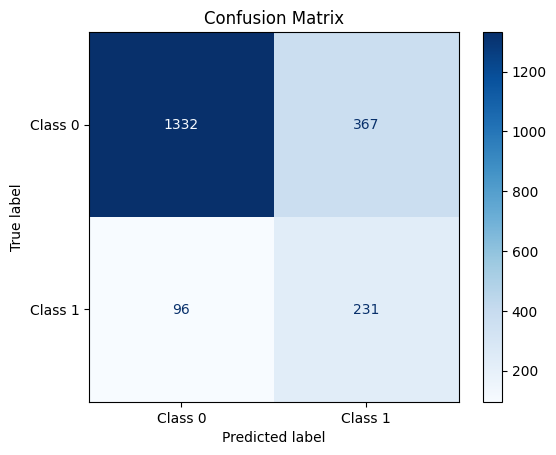

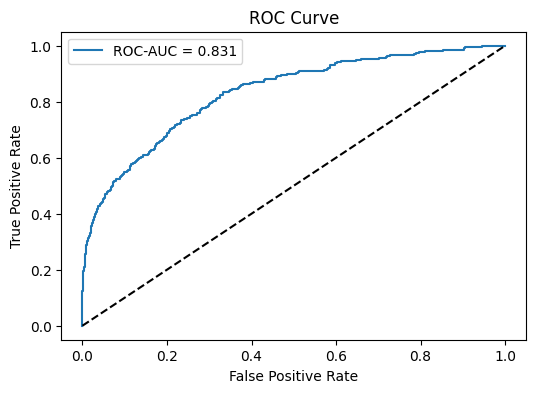

ROC-AUC Score: 0.831051904970184


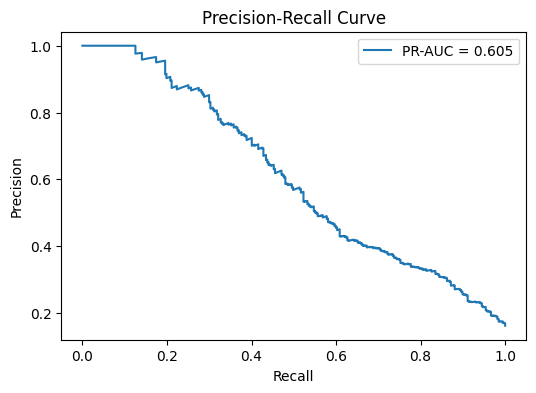

PR-AUC Score: 0.6051614824487889


In [69]:
prec = precision_score(y_test_enc, y_pred)
rec = recall_score(y_test_enc, y_pred)
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC-AUC Score:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test_enc, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
print("PR-AUC Score:", pr_auc)

In [39]:
with mlflow.start_run(run_name="smote"):

    # log parameters
    mlflow.log_param("experiment_type","smote")
    mlflow.log_params(lr.get_params())


    # fit model
    lr.fit(X_train_res, y_train_res)

    # predict
    y_pred = lr.predict(X_test_trans)
    y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

    # calcualte metrics
    prec = precision_score(y_test_enc, y_pred)
    rec = recall_score(y_test_enc, y_pred)
    roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_enc, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals)

    # log metrics
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("pr_auc", pr_auc)

    # Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # roc Curve
    fpr, tpr, _ = roc_curve(y_test_enc, y_pred_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    plt.close()

    # pr-curve
    plt.figure(figsize=(6,4))
    plt.plot(recall_vals, precision_vals, label=f"PR-AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.savefig("pr_curve.png")
    mlflow.log_artifact("pr_curve.png")
    plt.close()

    print(f"Precision: {prec:.3f}, Recall: {rec:.3f}")
    print(f"ROC-AUC Score: {roc_auc:.3f}, PR-AUC Score: {pr_auc:.3f}")

Precision: 0.386, Recall: 0.706
ROC-AUC Score: 0.831, PR-AUC Score: 0.605
🏃 View run smote at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4/runs/07e3851959b245b2bc599c16de51282e
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/4


In [ ]:
# this below codes checks the best threshold and calculates metrics

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Threshold = 0.70 with F1 = 0.541, Precision = 0.561, Recall = 0.523


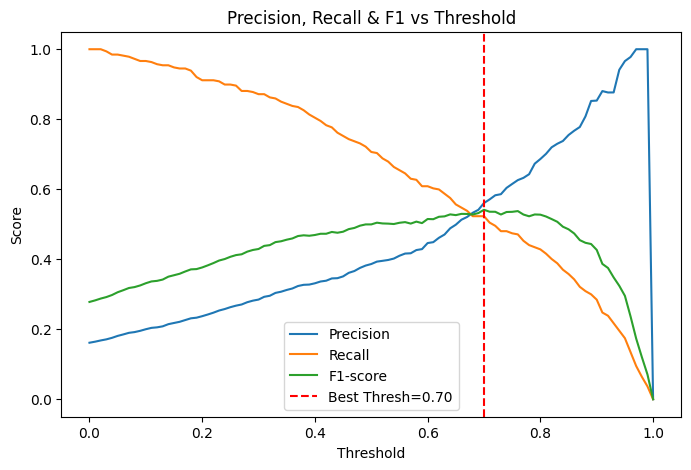

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Predict probabilities ---
y_pred_proba = lr.predict_proba(X_test_trans)[:, 1]

# --- Threshold tuning ---
thresholds = np.arange(0.0, 1.01, 0.01)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    precisions.append(precision_score(y_test_enc, y_pred_thresh))
    recalls.append(recall_score(y_test_enc, y_pred_thresh))
    f1s.append(f1_score(y_test_enc, y_pred_thresh))

# --- Find best threshold by F1 ---
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
print(f"Best Threshold = {best_threshold:.2f} with F1 = {f1s[best_idx]:.3f}, "
      f"Precision = {precisions[best_idx]:.3f}, Recall = {recalls[best_idx]:.3f}")

# --- Plot Precision & Recall vs Threshold ---
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1-score")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Thresh={best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs Threshold")
plt.legend()
plt.show()

Confusion Matrix (Custom Threshold):
[[1565  134]
 [ 156  171]]


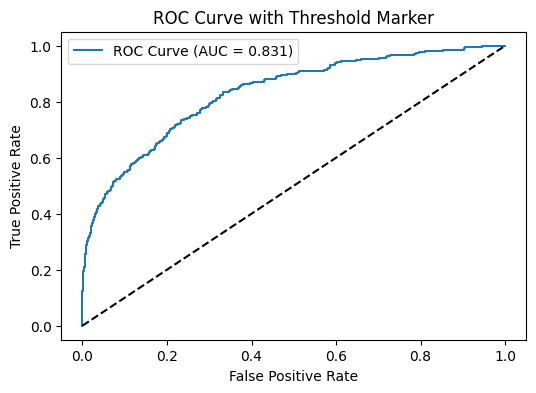

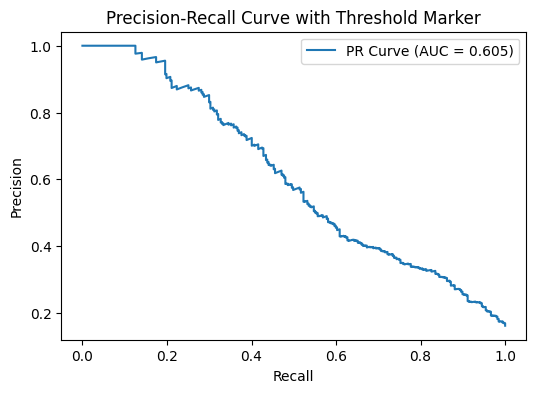

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix

# --- Custom Threshold ---
custom_threshold = 0.7
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

# --- Evaluation ---

print("Confusion Matrix (Custom Threshold):")
print(confusion_matrix(y_test_enc, y_pred_custom))

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test_enc, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold Marker")
plt.legend()
plt.show()

# --- Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test_enc, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Threshold Marker")
plt.legend()
plt.show()


In [ ]:
# there is not much of a difference between metrics so we prefer smote
# under sampler decreses our size while over smapler just duplicates our rows
# since smote works on interpolation differences we will use smote to sample our data